In [1]:
import pandas as pd
%matplotlib notebook

# To use this notebook, make sure to copy the two .parquest.gzip files from Google Drive 
# (Team Transpo / Datasets & Notebooks / Toad (Congestion) / toad_stop_to_stop_durations )
# and put them in the <data science repo> / data / interim / TOAD folder. 
# (you will need to make the TOAD folder if it doesn't exist.)

# Or change the path to point to them however you want :)

In [2]:
# stop_to_stop is all the bus stops that either stop at a stop or pass by a stop (basically not disturbance stops)
stops_df = pd.read_parquet('../data/interim/TOAD/stop_to_stop.parquet.gzip')

/Users/jbeyer/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/pyarrow/pandas_compat.py:708: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels = getattr(columns, 'labels', None) or [
/Users/jbeyer/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/pyarrow/pandas_compat.py:735: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  return pd.MultiIndex(levels=new_levels, labels=labels, names=columns.names)
/Users/jbeyer/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/pyarrow/pandas_compat.py:752: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels, = index.labels


In [3]:
# routes is the progression of stops along a route
routes_df = pd.read_parquet('../data/interim/TOAD/route_stops.parquet.gzip')

In [4]:
# There's ~ 54 million here!
stops_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53847000 entries, 1 to 54694745
Data columns (total 9 columns):
event_no_trip             int64
pattern_direction         object
line_id                   uint16
stop_type                 uint8
stop_id                   uint16
act_arr_time              datetime64[ns, UTC]
prev_stop_id              uint16
prev_stop_act_arr_time    datetime64[ns, UTC]
elapsed_time_seconds      uint16
dtypes: datetime64[ns, UTC](2), int64(1), object(1), uint16(4), uint8(1)
memory usage: 2.5+ GB


In [5]:
routes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9247 entries, 0 to 9246
Data columns (total 5 columns):
rte          9247 non-null int64
dir          9247 non-null int64
stop_seq     9247 non-null int64
stop_id      9247 non-null int64
stop_name    9247 non-null object
dtypes: int64(4), object(1)
memory usage: 433.5+ KB


In [8]:
# I chose route 35 for this
route = 35

# stop_to_stop has the current stop and previous stop on the same line to get the duration between them.
# This creates the same structure.
line = routes_df[routes_df['rte'] == route].copy()
line['prev_stop_id'] = line['stop_id'].shift(1)
line.fillna(0, inplace=True)
line['prev_stop_id'] = line['prev_stop_id'].astype('uint16')
line.head()

,rte,dir,stop_seq,stop_id,stop_name,prev_stop_id
3500,35,0,75,9635,N Portsmouth & Willamette,0
3501,35,0,150,4502,N Portsmouth & Yale,9635
3502,35,0,200,4497,N Portsmouth & Princeton,4502
3503,35,0,250,4492,N Portsmouth & Depauw,4497
3504,35,0,300,4495,N Portsmouth & Lombard St,4492


<IPython.core.display.Javascript object>


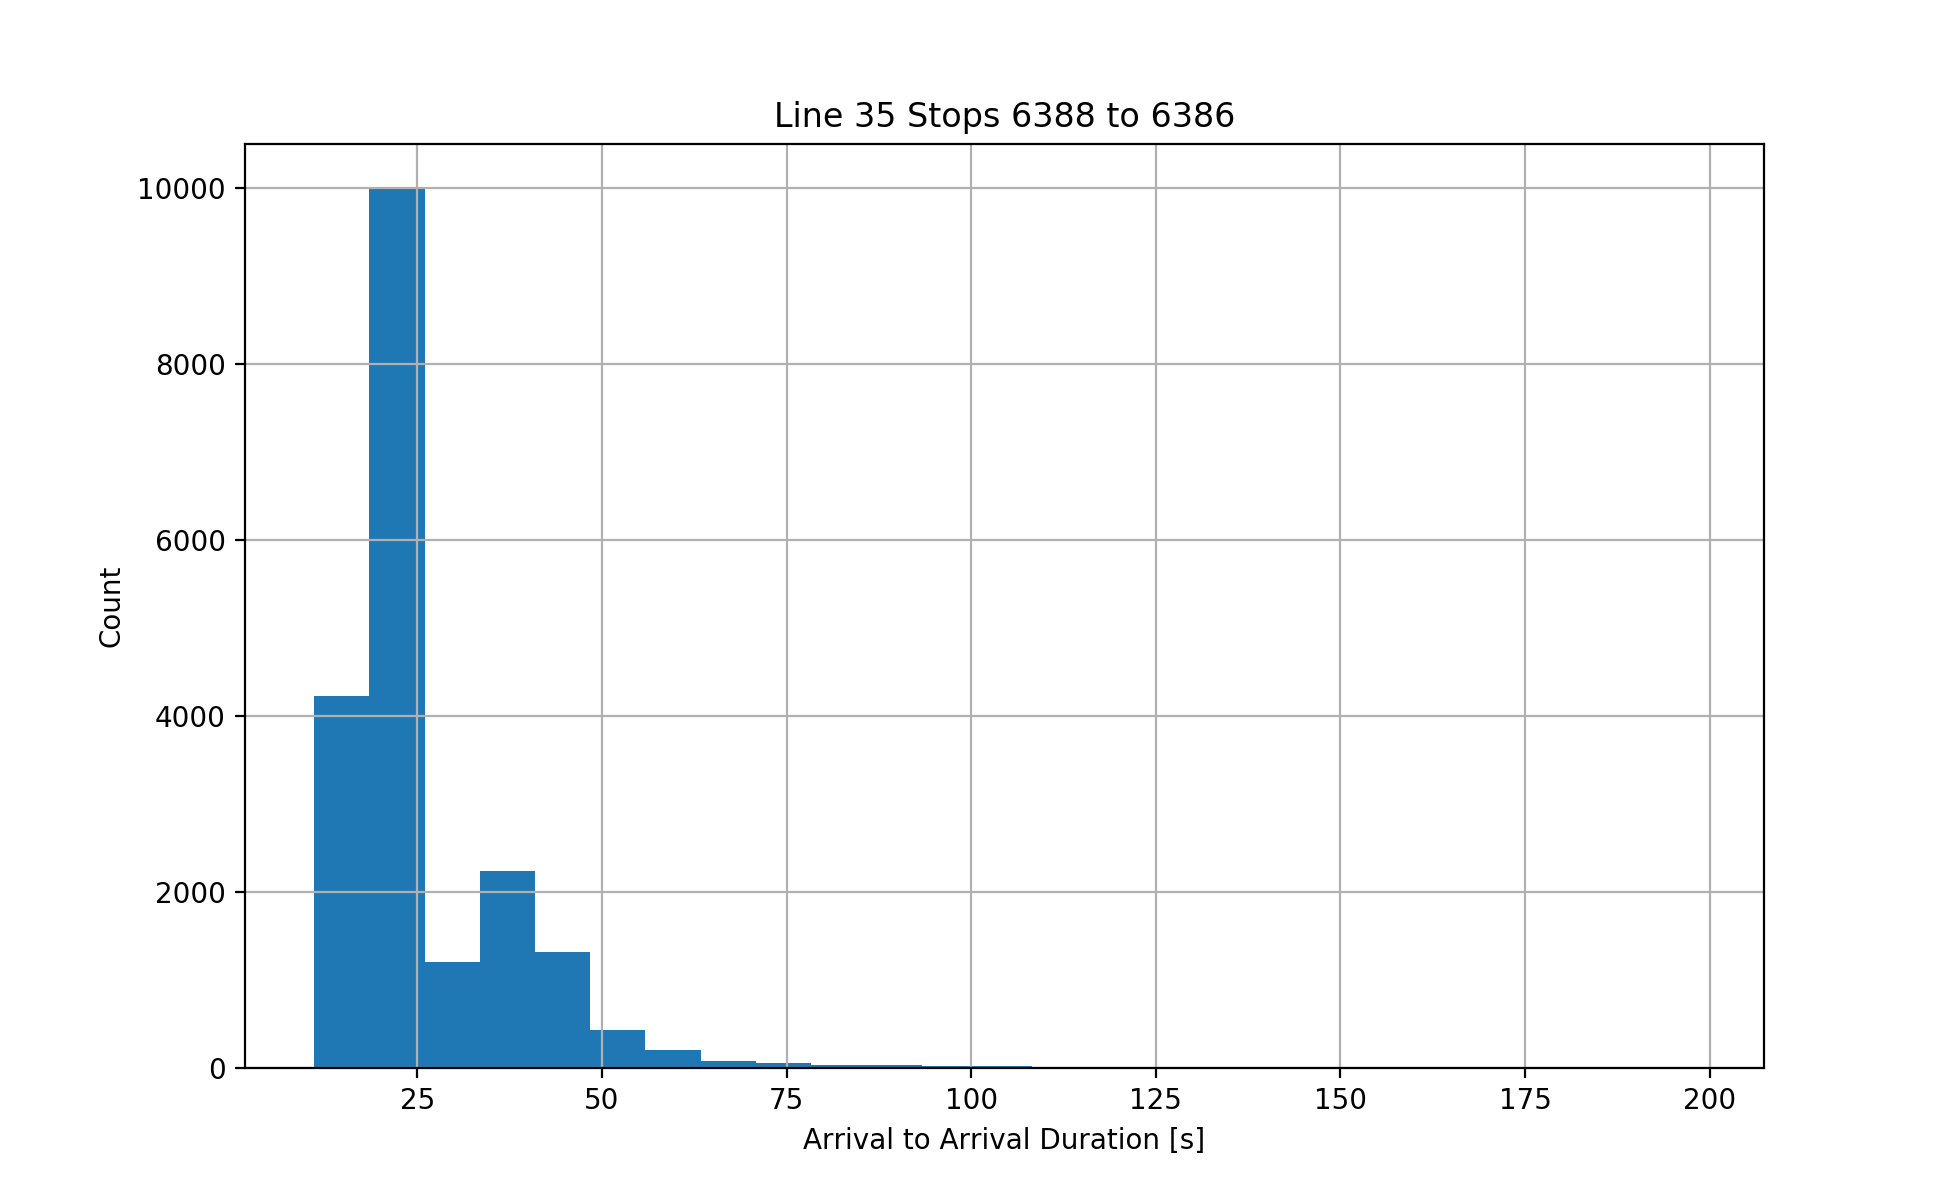

In [16]:
# Edit these to pick different stops, and adjust histogram.
row_num = 13
max_duration = 200
num_bins = 25

# Essentially this pulls all the occurances of stop to stop which gives us a distribution of those durations.
S = line.iloc[row_num][['stop_id', 'prev_stop_id']]
line_stops = stops_df[(stops_df['stop_id'] == S['stop_id']) & (stops_df['prev_stop_id'] == S['prev_stop_id'])]
ax = line_stops[line_stops['elapsed_time_seconds'] < max_duration].hist('elapsed_time_seconds', bins=num_bins)

xlabel = "Arrival to Arrival Duration [s]"
ylabel = "Count"
title = f"Line 35 Stops {S['prev_stop_id']} to {S['stop_id']}"

_ = ax[0][0].set(title=title, xlabel=xlabel, ylabel=ylabel)
ax[0][0].get_figure().set_size_inches((9.8,6))